<a href="https://colab.research.google.com/github/srv96/AI-ML-TensorFlow/blob/main/RNN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
mnist = tf.keras.datasets.mnist

(X_train , y_train) , (X_test , y_test) = mnist.load_data()
X_train , X_test = X_train / 255.0 , X_test / 255.0

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [4]:
i = tf.keras.layers.Input(shape = X_train[0].shape)
x = tf.keras.layers.LSTM(28,return_sequences=True)(i)
x = tf.keras.layers.GlobalMaxPool1D()(x)
x = tf.keras.layers.Dense(10 , activation = 'softmax')(x)
model = tf.keras.Model(i , x)

model.compile(
    optimizer = tf.keras.optimizers.Adam(0.01),
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
  )

r = model.fit(
    X_train, y_train,
    epochs = 10,
    validation_data = (X_test , y_test)
)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8015 - loss: 0.6516 - val_accuracy: 0.9679 - val_loss: 0.1116
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9659 - loss: 0.1179 - val_accuracy: 0.9689 - val_loss: 0.1061
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 5ms/step - accuracy: 0.9714 - loss: 0.0967 - val_accuracy: 0.9723 - val_loss: 0.0987
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9741 - loss: 0.0871 - val_accuracy: 0.9740 - val_loss: 0.0847
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9770 - loss: 0.0792 - val_accuracy: 0.9689 - val_loss: 0.0984
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9775 - loss: 0.0725 - val_accuracy: 0.9760 - val_loss: 0.0822
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9779 - loss: 0.0734 - val_accuracy: 0.9734 - val_loss: 0.0883
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9800 - loss: 0.0

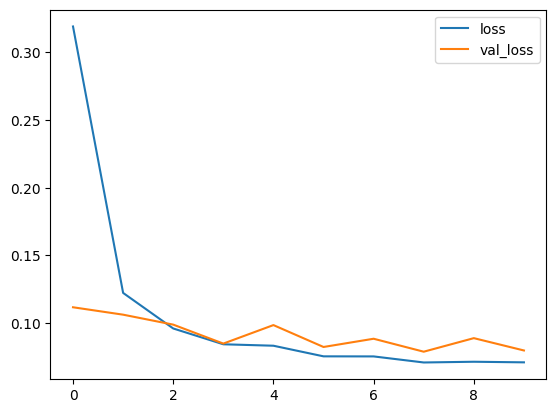

In [5]:
plt.plot(r.history['loss'] , label = 'loss')
plt.plot(r.history['val_loss'] , label = 'val_loss')
plt.legend()

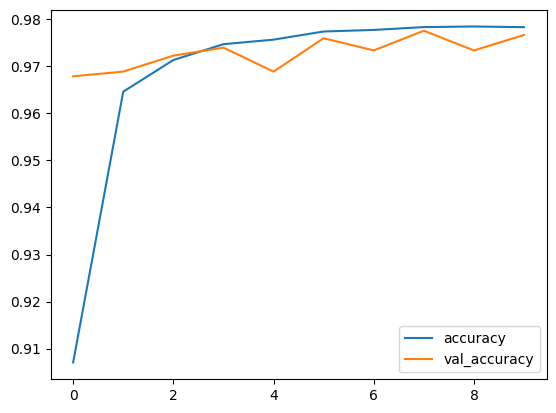

In [6]:
plt.plot(r.history['accuracy'] , label = 'accuracy')
plt.plot(r.history['val_accuracy'] , label = 'val_accuracy')
plt.legend()

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
Confusion Matrix without normalization
[[ 963    0    3    0    0    0    6    1    7    0]
 [   0 1127    3    1    0    0    3    1    0    0]
 [   2    0 1018    0    1    0    2    5    2    2]
 [   0    1   11  975    1   16    0    4    1    1]
 [   2    0    3    0  937    0    8    1   10   21]
 [   2    1    0   10    1  869    1    2    4    2]
 [   1    2    5    0    1    5  942    0    2    0]
 [   0    1   14    1    7    0    0  999    1    5]
 [   3    2    6    1    2    2    5    2  947    4]
 [   0    0    1    0    1    2    0    6    9  990]]


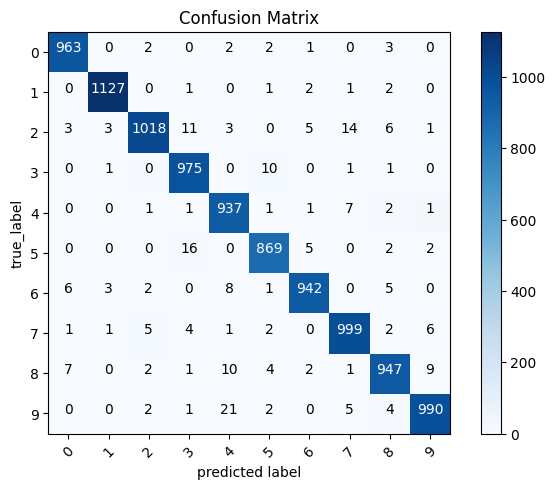

In [7]:
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion Matrix',
                          cmap= plt.cm.Blues):

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion Matrix without normalization')
    print(cm)

    plt.imshow(cm,interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation=45)
    plt.yticks(tick_marks,classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i ,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
      plt.text(i,j,format(cm[i,j],fmt), horizontalalignment='center',color='white' if cm[i,j] > thresh else 'black' )

    plt.tight_layout()
    plt.ylabel('true_label')
    plt.xlabel('predicted label')
    plt.show()

p_test = model.predict(X_test).argmax(axis=1)
cm = confusion_matrix(y_test,p_test)
plot_confusion_matrix(cm,list(range(10)))

Text(0.5, 1.0, 'True Label: 2, Predicted: 0')

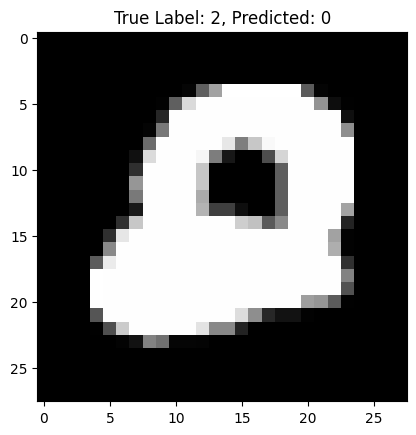

In [11]:
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(X_test[i],cmap='gray')
plt.title("True Label: %s, Predicted: %s" % (y_test[i], p_test[i]))
